<a href="https://colab.research.google.com/github/FerDoranNie/Stori_analytics_engineering_challenge/blob/master/Stori_analytics_engineering_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Story Analytics Engineering Challenge 🤓

## Purpose of this notebook

Hello, my name is Fernando Dorantes Nieto

**I did this notebook in order to show the code and the instruction on how I solved the challenge that Stori send me in order to test my skills to apply for the Analytics Engineering position.**




### Some instructions before to proceed

##### **This notebook has different sections, to see them as an index,  please click on the first icon on the left side.**

## Instructions of the challenge


In order fot not to miss any details of the instructions for this challenge.
I will paste the instructions just as they were shared with me.
#### Main instructions given

You have 3 different files, each containing different information:

- user information,
- transactional information,
- package delivery information.

Based on these files, do the following:
1. Explore the three files and, based on your findings, write a data dictionary for each file and a UML diagram.
Hint: Think of all the areas that can help others better understand the data

2. Create a merged file that consolidates the information. Make sure that:
- Date formats are standardized to YYYY-MM-DD,
- Timestamp fields have the Mexico City time zone,
- Numeric fields have two decimal places,
- Text strings do not exceed 256 characters.

Please write comments in the script explaining each code statement.

3. Design a DAG for the production deployment of your merged table creation. Based on that, answer the following questions:
- Would you choose ETL or ELT? Why?
- Which part of the process would you emphasize most? Why?

4. Write SQL queries to answer the following:
- How many users are there in total?
- How many users have transacted?
- What is the card delivery rate?
- Which is the most efficient package courier?
- Which are the top 10 categories with the most transactions?
Hints:
- Check data quality
- There are different ways to measure efficiency with the information provided, think of one that can best measure impact.
- Categories refers to transaction_type


## How will this callenge be solved?

As shown in the instructions in the previous paragraphs, the challenge consists of different steps.

In this notebook each of the instructions will be explained step by step and the titles will be shown in the index.

The UML as well as the processes for the DAG and the queries will be explained in this document. As the same time if there is a  need  to  add external links it will be done and it will be explained how they work.

At the same time this document the queries and the instructions will be stored in a repository on GitHub.

[Challenge GitHug repository](https://github.com/FerDoranNie/Stori_analytics_engineering_challenge)

It is important to note that the dialect used fot queries will be ***MySQL*** and the programming language for data manipulation, query execution and data display will be ***Python***.

## Starting the challenge

### Installing/Loading the necessary libraries and Google Drive connection

In [52]:
## What are the libraries that Colaboratory has installed?
import sys
libraries = [x for x in  sys.modules]
required_libraries = [
    'pandas',  ### For Data Manipulation
    'numpy',  ### For numeric manipulation and math calculations
    'matplotlib', ## For charts
    'seaborn',  ## For charts but more prettier
    'plotnine', ## Charts like ggplot2
    'datetime', ## For date and time manipulation
    'pytz', ## For timezones
    'sqlalchemy', ### For connection to SQL databases
    'pymysql', ## For connection to MySQL dialect
    'PyDrive2', ## For Google Drive Connection
]


non_installed_libraries = [x for x in required_libraries if x not in libraries]

print('These libraries are not installed: \n' + '\n'.join('{}:{}'.format(*l)
  for l in enumerate(non_installed_libraries, start=1)))




These libraries are not installed: 
1:seaborn
2:plotnine
3:PyDrive2
4:wordcloud 


In [53]:
! pip install pandas seaborn plotnine pytz sqlalchemy pymysql PyDrive2

In [54]:
### Google Drive Connection
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

The next code cell is necessary to run in order to get the data that we need.

**Please run it and after of that a new window will appear and you must login with your google account, after of that you must copy the code and paste when it is required. (It is necessary if it's your first time logging in colaboratory if you logged before, the window does not appear).**

The Google Drive files are public so any person can use them.


In [55]:
## Authentication with Google Drive, please read the instructions above for more information
auth.authenticate_user()
googleAuth  = GoogleAuth()
googleAuth.credentials = GoogleCredentials.get_application_default()
drive= GoogleDrive(googleAuth)


### Load Data and exploratory analysis

#### Downloading the data from Google Drive

In [56]:
## Google Drive Links files
### https://drive.google.com/file/d/1Du08zh07CbJNgrWKk2Lxro7SZ3VvYI_m/view?usp=drive_link
### https://drive.google.com/file/d/1kx0ii4zh9Khhq2KV3Uuz2xvGvpo4xl6i/view?usp=drive_link
### https://drive.google.com/file/d/123xteQxAcUDHz09KHWFfyzsuGV8q9r08/view?usp=drive_link
### https://drive.google.com/file/d/1oDgCOxo99T8u2osPOaHfboFWIF773t9K/view?usp=drive_link

packageDataIdDrive = '1Du08zh07CbJNgrWKk2Lxro7SZ3VvYI_m'
transactionDataIdDrive = '1kx0ii4zh9Khhq2KV3Uuz2xvGvpo4xl6i'
userDataIdDrive = '123xteQxAcUDHz09KHWFfyzsuGV8q9r08'
pemFileIdDrive = '1oDgCOxo99T8u2osPOaHfboFWIF773t9K'

In [57]:
## Function to download the files from Drive to Colab
def downloadDrivefile(fileId, fileName):
  fileDownloaded = drive.CreateFile({'id': fileId})
  fileDownloaded.GetContentFile(fileName)


In [58]:
## Download the files
downloadDrivefile(fileId= packageDataIdDrive,
                  fileName='package_delivery_info.csv')
downloadDrivefile(fileId= transactionDataIdDrive,
                  fileName='transaction_info.csv')
downloadDrivefile(fileId= userDataIdDrive,
                  fileName='user_info.csv')

downloadDrivefile(fileId= pemFileIdDrive,
                  fileName='ca.pem')


#### Loading the data

In [59]:
import pandas as pd
import numpy as np

In [60]:
## Loading the data with pandas functions
packageData = pd.read_csv('package_delivery_info.csv')
transactionData = pd.read_csv('transaction_info.csv')
userData = pd.read_csv('user_info.csv')


In [61]:
## Function to get the data types of the columns and show in a readable format
def columnTypesDf(df):
  typesValues = df.dtypes
  mainDict =  {'col_name': typesValues.index,
               'data_type_original': typesValues.values}
  mainDf  = pd.DataFrame(mainDict)
  mainDf['data_type_edited'] = np.where(mainDf['data_type_original']=='object',
                                        'string', mainDf['data_type_original'])
  return mainDf


Let's check the datatypes of package data and see the first 3 rows of the dataset


In [62]:
columnTypesDf(packageData)

,col_name,data_type_original,data_type_edited
0,package_id,object,string
1,courier,object,string
2,delivery_date,object,string
3,delivery_status,object,string
4,user_id,object,string


In [63]:
packageData.head(3)

,package_id,courier,delivery_date,delivery_status,user_id
0,80c09506-8a61-454a-a226-22e639d8795b,DHL,09-12-2022,Delivered,1d10b266-b7b2-4258-88b3-3957de0461ea
1,2e321909-afe9-4ed2-9065-05425bce5394,ups,05/16/2021,In Transit,bf04c0b9-8a09-49e4-b4a5-0b2915bc5143
2,89b8b5d6-b90e-4a29-9d1e-a9a9db4d1e03,UPS,2022-08-30,Pending,616735b6-b8db-4517-bb3f-8171ec2a6166


Now it's time to check the transaction data

In [64]:
columnTypesDf(transactionData)

,col_name,data_type_original,data_type_edited
0,transaction_id,object,string
1,user_id,object,string
2,amount,float64,float64
3,timestamp,object,string
4,transaction_type,object,string


In [65]:
transactionData.head(3)


,transaction_id,user_id,amount,timestamp,transaction_type
0,8b266b46-9ec7-4010-83e4-004b3bef400f,1d10b266-b7b2-4258-88b3-3957de0461ea,865.48,2023-06-11 06:12:30,In-Store
1,98ae73d5-6918-4790-9d63-eedf8ad43a0b,bf04c0b9-8a09-49e4-b4a5-0b2915bc5143,416.50,2023.08.30 09:26,Subscription
2,483b1462-9efe-4e9e-a659-da11640c3201,616735b6-b8db-4517-bb3f-8171ec2a6166,473.42,11/22/2023 01:09 AM,Online


Last I'm goint to check the user data

In [66]:
columnTypesDf(userData)

,col_name,data_type_original,data_type_edited
0,user_id,object,string
1,name,object,string
2,email,object,string
3,join_date,object,string


In [67]:
userData.head(3)

,user_id,name,email,join_date
0,1d10b266-b7b2-4258-88b3-3957de0461ea,Angela Smith,nfischer@yahoo.com,02/06/2023
1,bf04c0b9-8a09-49e4-b4a5-0b2915bc5143,Mr. John Powell,rebeccabarnes@yahoo.com,2022-05-04
2,616735b6-b8db-4517-bb3f-8171ec2a6166,Susan Chase,riverschristopher@davis.net,2022-01-01


##### Notes about the data types of the files

The original datasets need to be modified as mps of the columns are detected as string

The datasets have some columns that corresponds to datetime or date and they need to be cleaned in order to get the real values.

This cleaning will be made in the next sections.

### 1.- UML and Data Dictionary
Instructions

Explore the three files and, based on your findings, write a data dictionary for each file and a UML diagram

#### UML

[UML in detail](https://dbdiagram.io/d/Stori-Challenge-EML-67367042e9daa85aca8268cc)

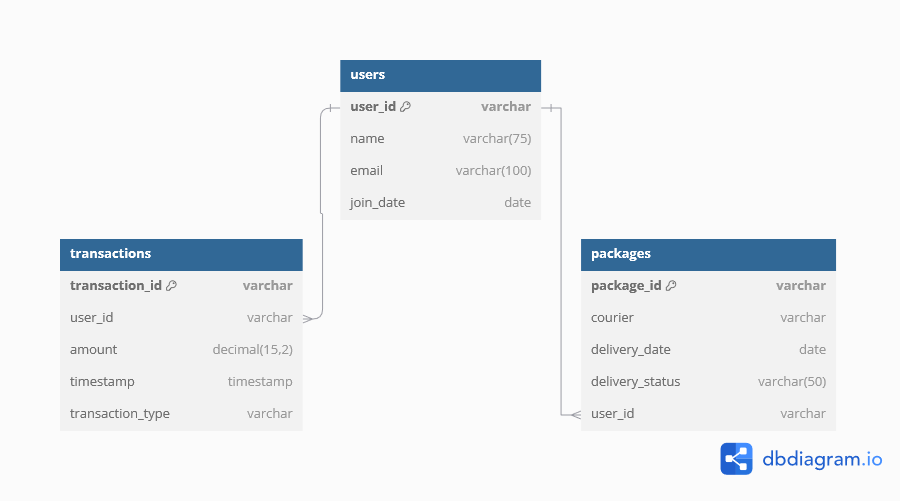

#### Data Dictionary

##### Transactions Table

|Database field |Data type| Description | Example| Restrictions|
|---------------|---------------|--------------------------------------------------|-----------------------|----------------------------------------|
|`transaction_id`|varchar|Unique identifier of the transaction|8B223ASDAAS-4512-00045787|Primary key, not null values|
|`user_id`|varchar|Identifier of the user who makes the transaction|78A444545AS-8734-456TYTAA|No restrictions|
|`amount`|float|Numeric value related to the amount of the transaction|54.12|Rounded to two and up to 15 digits for value|
|`timestamp`|timestamp|Time of the transaction in UTC|2023-01-01 06:12:14|Format YYY-MM-DD HH:MM:SS|
|`transaction_type`|varchar|Category of the transaction|Subscription|Up to 50 characters|

##### Packages Table

|Database field |Data type| Description | Example| Restrictions|
|---------------|---------------|--------------------------------------------------|-----------------------|----------------------------------------|
|`package_id`|varchar|Unique identifier of the package sent |7A342RTSEQA-7836-32157815|Primary key, not null values|
|`courier`|varchar|Category that identifies the company who delivery the package|DHL|Up to 50 characters|
|`delivery_date`|date|Date indicating when the package was delivered|2022-07-05|Format YYY-MM-DD|
|`delivery_status`|varchar|Category indicating the package delivery status|Delivered|Up to 50 characters|
|`user_id`|varchar|Identifier of the user who received the package|78A444545AS-8734-456TYTAA|No restrictions|

##### Users Table

|Database field |Data type| Description | Example| Restrictions|
|---------------|---------------|--------------------------------------------------|-----------------------|----------------------------------------|
|`user_id`|varchar|Unique identifier of the user|78A444545AS-8734-456TYTAA|Primary key, not null values|
|`name`|varchar|Complete name of the user|Cosme Fulanito|Up to 75 characters|
|`email`|varchar|Email of the user|fulanito.cosme@gmail.com|Up to 100 characters|
|`join_date`|date|Date of user login to the platform|2023-06-02|Format YYY-MM-DD|


### 2.- Merging Data and Data Cleaning
Instructions
Create a merged file that consolidates the information. Make sure that:
- Date formats are standardized to YYYY-MM-DD,
- Timestamp fields have the Mexico City time zone,
- Numeric fields have two decimal places,
- Text strings do not exceed 256 characters.


#### Previous steps for data cleaning

##### Check the data types

I'm goint to check a summary of every dataset and after of that I'm going to check the date values that are the most complicated

In [68]:
test = pd.DataFrame({
    'user_id': ['7A342RTSEQA-7836-32157815', '7B564RTYOP-9456-78951234'],
    'name': ['Juana la Cubana', 'Ana Lava la Tina'],
    'email': ['la.cubana@example.com', 'anita_tina@example.com'],
    'amount': [54.12, 100.50],
    'join_date': ['2023-01-01', '2023-06-02'],
    'cantidades': [1,2]
})

print(test['join_date'].dtype)

test['join_date'].isnull().any()

object


False

In [69]:
### I'm going to create a function that detects the type of every column
### If the column is character or date the function prints the unique value,
### if is numeric, the function prints a statistical summary
def quickViewDf(df):
  columns = df.columns
  for column in columns:
    print(f'Column evaluated is {column}') ## Evaluates every column
    nullValues = df[column].isnull().any()
    print(f'Does this column have null values: {nullValues}')
    if df[column].dtype in ('float64', 'int64'): ## if the data type is integer or float gives a summary
      print(df[column].describe())
    else:
      uniqueValues = df[column].unique() ### Get the unique values
      maxCharValues = np.max(df[column].str.len()) ### Detect the max number of characters of all rows and give the number
      print(f'Total values {len(df[column])}')
      print(f'Unique values {len(uniqueValues)}')
      print(f'Max number of characters evaluated in all rows: {maxCharValues}')
      print(uniqueValues)
    print('-------------------------------')





In [70]:
quickViewDf(transactionData)

Column evaluated is transaction_id
Does this column have null values: False
Total values 10002
Unique values 10000
Max number of characters evaluated in all rows: 36
['8b266b46-9ec7-4010-83e4-004b3bef400f'
 '98ae73d5-6918-4790-9d63-eedf8ad43a0b'
 '483b1462-9efe-4e9e-a659-da11640c3201' ...
 'fa91e893-25d6-4acf-b8ba-70e6655a985c'
 '3b7226ab-3e15-41d4-b1a8-8bb40cd58198'
 '45c3a0fe-5f12-40b6-a0d9-714bebdcec7a']
-------------------------------
Column evaluated is user_id
Does this column have null values: False
Total values 10002
Unique values 10000
Max number of characters evaluated in all rows: 36
['1d10b266-b7b2-4258-88b3-3957de0461ea'
 'bf04c0b9-8a09-49e4-b4a5-0b2915bc5143'
 '616735b6-b8db-4517-bb3f-8171ec2a6166' ...
 'ffdddbb5-7988-4d29-bc05-3005955d9a46'
 '19ede31b-9973-4045-ad18-34fe7753f8ec'
 '2edc892a-50f2-4dfc-8d8a-5d47f528f2fd']
-------------------------------
Column evaluated is amount
Does this column have null values: False
count    10002.000000
mean       495.455799
std      

In [71]:
quickViewDf(packageData)

Column evaluated is package_id
Does this column have null values: False
Total values 10002
Unique values 10000
Max number of characters evaluated in all rows: 36
['80c09506-8a61-454a-a226-22e639d8795b'
 '2e321909-afe9-4ed2-9065-05425bce5394'
 '89b8b5d6-b90e-4a29-9d1e-a9a9db4d1e03' ...
 'aed2b69d-1aef-44aa-9f79-52a7bc88f1e8'
 '71aa3136-17fe-4628-98cd-f46b0c893c28'
 'b55f438f-18ce-4464-9e7e-6bb63384f8f8']
-------------------------------
Column evaluated is courier
Does this column have null values: False
Total values 10002
Unique values 5
Max number of characters evaluated in all rows: 6
['DHL' 'ups' 'UPS' 'FEDEX' 'DHL   ']
-------------------------------
Column evaluated is delivery_date
Does this column have null values: False
Total values 10002
Unique values 3921
Max number of characters evaluated in all rows: 10
['09-12-2022' '05/16/2021' '2022-08-30' ... '2021.10.06' '2022.02.12'
 '15-05-2022']
-------------------------------
Column evaluated is delivery_status
Does this column have

In [72]:
quickViewDf(userData)

Column evaluated is user_id
Does this column have null values: False
Total values 10002
Unique values 10000
Max number of characters evaluated in all rows: 36
['1d10b266-b7b2-4258-88b3-3957de0461ea'
 'bf04c0b9-8a09-49e4-b4a5-0b2915bc5143'
 '616735b6-b8db-4517-bb3f-8171ec2a6166' ...
 'ffdddbb5-7988-4d29-bc05-3005955d9a46'
 '19ede31b-9973-4045-ad18-34fe7753f8ec'
 '2edc892a-50f2-4dfc-8d8a-5d47f528f2fd']
-------------------------------
Column evaluated is name
Does this column have null values: False
Total values 10002
Unique values 9362
Max number of characters evaluated in all rows: 26
['Angela Smith' 'Mr. John Powell' 'Susan Chase' ... 'Melissa Gonzalez'
 'Debbie Hamilton' 'Joanna Williams']
-------------------------------
Column evaluated is email
Does this column have null values: False
Total values 10002
Unique values 9934
Max number of characters evaluated in all rows: 40
['nfischer@yahoo.com' 'rebeccabarnes@yahoo.com'
 'riverschristopher@davis.net' ... 'chloemcdonald@barnes.net'
 '

###### Notes about checking types
After of the quick evaluation I have some notes:
- All the columns on all datasets don't have null values
- All datasets have different date formats in the columns with that type, it is necessary to clean and adapt those columns to the correct format.

- The courier column of the dataset called packages must be modified because has extra values and needs to be conver to a lower case or upper case.

- *At the same time I can say that all string columns do not exceed the number of characters limit (256)* ❗


#### Cleaning Data

In [73]:
import re
from datetime import datetime
from typing import Optional

In [74]:
### I'm going to create a function in order to detect the different data types

#packageData['delivery_date'][[bool(re.search('[.]',i)) for i in  packageData['delivery_date']]]

def detectPatternDateFromStr(datestr: str) -> Optional[str]:
  dictPatterns={
      r'^\d{4}-\d{2}-\d{2}$':'%Y-%m-%d',
      r'^\d{4}\.\d{2}\.\d{2}$':'%Y.%m.%d',
      #r'^\d{2}-\d{2}-\d{4}$':'%m-%d-%Y',
      r'^\d{2}/\d{2}/\d{4}$':'%m/%d/%Y',
      r'^\d{4}/\d{2}/\d{2}$':'%Y/%m/%d',
      r'^\d{2}\.\d{2}\.\d{4}$':'%m.%d.%Y',
      r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$':'%Y-%m-%d %H:%M:%S',
      r'^\d{2}/\d{2}/\d{4} \d{2}:\d{2} [APap][Mm]$':'%m/%d/%Y %I:%M %p',
      r'^\d{4}\.\d{2}\.\d{2} \d{2}:\d{2}$':'%Y.%m.%d %H:%M',
      r'^\d{2}-\d{2}-\d{4} \d{2}:\d{2}$':'%d-%m-%Y %H:%M',
      #r'^\d{2}-\d{2}-\d{2}$':'%m-%d-%y',
      r'^([0-2][0-9]|3[0-1])-(0[1-9]|1[0-2])-\d{4}$':'%d-%m-%Y',
      r'^(0[1-9]|1[0-2])-([0-2][0-9]|3[0-1])-\d{4}$':'%m-%d-%Y',
      r'^\d{4}\d{2}\d{2}$':'%Y%m%d',
      r'^\d{2}/\d{2}/\d{2}$':'%m/%d/%y'
  }

  for pattern, format in dictPatterns.items():
    if re.match(pattern, datestr):
      return format

  return None


def convertStrToDateFromFormat(datestr):
  dateFormat = detectPatternDateFromStr(datestr)
  if dateFormat:
    return pd.to_datetime(datestr, format= dateFormat)
  else:
    return None

#11-05-2023 16:35
#%m-%d-%Y

#strTest = '26-11-2021'

#bool(re.match('^(0[1-9]|1[0-2])-([0-2][0-9]|3[0-1])-\d{4}$', strTest))

In [75]:
## Function to clean and make lowercase str columns not related to

#x = 'transaction'
#print(bool(re.search('id|name|email', x)))
def cleandAndLower(df):
  columns = df.columns
  for column in columns:
    if df[column].dtype=='object':
      if not re.search('id|name|email', column):
        df[column]= df[column].str.strip()
        df[column]= df[column].str.lower()
  return df



Checking the dates and convert to the desired format 'YYYY-MM-DD' in dates or
'YYYY-MM-DD HH:MM:SS' in timestamps


In [76]:
### Let's apply the function to generate the desired date format from dirty dates formats in the columns
packageData['delivery_date'] = packageData['delivery_date'].apply(convertStrToDateFromFormat)
transactionData['timestamp'] = transactionData['timestamp'].apply(convertStrToDateFromFormat)
userData['join_date'] = userData['join_date'].apply(convertStrToDateFromFormat)


In [77]:
### Check if the conversion works, if there are values > 0 there are dates not converted
print(packageData[packageData['delivery_date'].isnull()].shape[0])
print(transactionData[transactionData['timestamp'].isnull()].shape[0])
print(userData[userData['join_date'].isnull()].shape[0])

0
0
0


The functions applied works fine, we could deleted the blank spaces to the courier column from the package dataset

In [78]:
### Clean the strings columns from spaces and lowercase the values of package data (id columns, names and emails are avoided)
packageData = cleandAndLower(packageData)
print(packageData['courier'].unique())
print(packageData['delivery_status'].unique())

['dhl' 'ups' 'fedex']
['delivered' 'in transit' 'pending' 'lost']


In [79]:
### Clean the strings columns from spaces and lowercase the values of transaction data (id columns, names and emails are avoided)
transactionData = cleandAndLower(transactionData)
print(transactionData['transaction_type'].unique())


['in-store' 'subscription' 'online']


In [80]:
### Let's round the values of amount in transaction data to two decimals
transactionData['amount'] = transactionData['amount'].round(2)

In [81]:
### Clean the strings columns from spaces and lowercase the values of user data (id columns, names and emails are avoided)
userData = cleandAndLower(userData)

In [82]:
## Drop Duplicates in all databases
transactionData = transactionData.drop_duplicates()
userData = userData.drop_duplicates()
packageData = packageData.drop_duplicates()

transactionData = transactionData.drop_duplicates(subset=['transaction_id'])
userData = userData.drop_duplicates(subset=['user_id'])
packageData = packageData.drop_duplicates(subset=['package_id'])


In [83]:
#transactionData[transactionData['transaction_id']=='8b266b46-9ec7-4010-83e4-004b3bef400f']

#### Merge Datasets

In [84]:
## Let's see the original size of every dataset provided
print(packageData.shape)
print(transactionData.shape)
print(userData.shape)


(10000, 5)
(10000, 5)
(10000, 4)


In [85]:
### First I'm going to join transaction data with user data an after of that merge the new data with package data
desiredColsUnion = userData.columns.append(transactionData.columns).append(packageData.columns)
desiredColsUnion = desiredColsUnion.unique() ## This is because i want a specific order of the columns after the join

transactionAndUserData = pd.merge(transactionData, userData, on='user_id') # First Merge

mergedData = pd.merge(transactionAndUserData, packageData, on='user_id') # Second Merge

mergedData= mergedData[desiredColsUnion] ## Select the columns in the order required
mergedData = mergedData.drop_duplicates() ## Drop Duplicates

In [86]:
## Load special formatters of google colab to make more readable the tables
from google.colab import data_table
data_table.enable_dataframe_formatter()


***Let's print the new table***

In [87]:
mergedData.head(10)

,user_id,name,email,join_date,transaction_id,amount,timestamp,transaction_type,package_id,courier,delivery_date,delivery_status
0,1d10b266-b7b2-4258-88b3-3957de0461ea,Angela Smith,nfischer@yahoo.com,2023-02-06,8b266b46-9ec7-4010-83e4-004b3bef400f,865.48,2023-06-11 06:12:30,in-store,80c09506-8a61-454a-a226-22e639d8795b,dhl,2022-12-09,delivered
1,bf04c0b9-8a09-49e4-b4a5-0b2915bc5143,Mr. John Powell,rebeccabarnes@yahoo.com,2022-05-04,98ae73d5-6918-4790-9d63-eedf8ad43a0b,416.50,2023-08-30 09:26:00,subscription,2e321909-afe9-4ed2-9065-05425bce5394,ups,2021-05-16,in transit
2,616735b6-b8db-4517-bb3f-8171ec2a6166,Susan Chase,riverschristopher@davis.net,2022-01-01,483b1462-9efe-4e9e-a659-da11640c3201,473.42,2023-11-22 01:09:00,online,89b8b5d6-b90e-4a29-9d1e-a9a9db4d1e03,ups,2022-08-30,pending
3,a6266c94-16ee-4914-a587-a3d43a81f913,Sally Smith,mswanson@mitchell-cooper.com,2021-07-20,9954f0e8-487a-4bb8-9596-41d2dbfec7b4,307.00,2023-05-20 04:46:00,in-store,f13aa104-f973-4a2e-bac0-6a04ac86b9ae,dhl,2021-12-08,in transit
4,ccac9e39-e865-4a9f-acc3-1cf90c862ede,Albert Cordova,uhicks@macias-patterson.com,2023-09-26,ee42937c-7f14-4782-82b9-dfa0f14773e5,183.00,2023-11-05 23:21:00,subscription,51f15194-b5ad-4062-9bd2-16738f9667f0,ups,2022-12-05,lost
5,d7be528d-0e2c-4410-ba87-306c4a04fcab,Shawn Anderson,angelaclark@calderon.info,2023-08-23,a0b4e7d0-c7d4-4ee4-84ad-acdb8379f8ec,689.80,2023-06-16 05:13:00,online,75bb8e99-ff6a-45b6-bcf5-120af842c8c2,fedex,2021-11-26,in transit
6,43720d9b-c242-4c83-ae28-9004770a7044,Corey Hickman,william65@hess-walker.com,2022-11-04,44bc6f22-54ac-4498-9945-6e686f763726,37.60,2023-05-11 16:35:00,in-store,c19ca5d8-bb7d-4f0d-a0bf-9da6d5f0f9dd,ups,2021-08-31,pending
7,aa7c68aa-2e5b-4255-98b8-2ee5048d40eb,Jeffrey Mosley,jordanstephanie@bryan-gaines.com,2021-11-07,eddad204-f1d9-40cd-8f0b-fb8208a9b057,560.80,2023-12-06 19:49:00,in-store,4c010ef6-fd78-4813-8328-1afb057bf324,dhl,2022-05-09,lost
8,95af9858-5249-4e5f-b409-1fd058f6042f,Jason Smith,duane30@griffin-rodriguez.net,2022-08-07,a2f211e9-7cfd-4768-b4ec-e86cceee1555,495.80,2023-11-21 04:36:55,online,d9eb0820-5822-4483-a99e-44bdf75c8ac9,ups,2022-09-09,lost
9,19a5870d-e88b-4825-a322-7c991ee1ffe5,Jason Peters,braundaniel@webb.net,2024-01-17,ad2a3f5e-975a-4787-a121-3708d3a618c6,118.00,2023-05-05 10:26:00,subscription,2e636598-a94b-47cd-a1d2-1a7f1de8d3d1,dhl,2022-11-23,pending


###### Notes about cleaning and merging

The cleaning of this dataset was a little tricky, the columns related with date formats have several formats and I need to use regular expressions to clean the dates and obtain the desire format.

After of that the cleaning was easier and I just need to apply simple functions to clean spaces and lowercase the values.

At the end the merging was easier and just need to join with the 'user_id' as the union key

### 3.- DAG area
Instructions
Design a DAG for the production deployment of your merged table creation. Based on that, answer the following questions:
- Would you choose ETL or ELT? Why?
- Which part of the process would you emphasize most? Why?


 #### ETL vs ELT

The dataset has different problems with the quality of the data.
So for this reason I choose the ETL process instead of ELT this is because is more complicated to create regular expressions (To clean the date formats) in the databases than using a programming language.


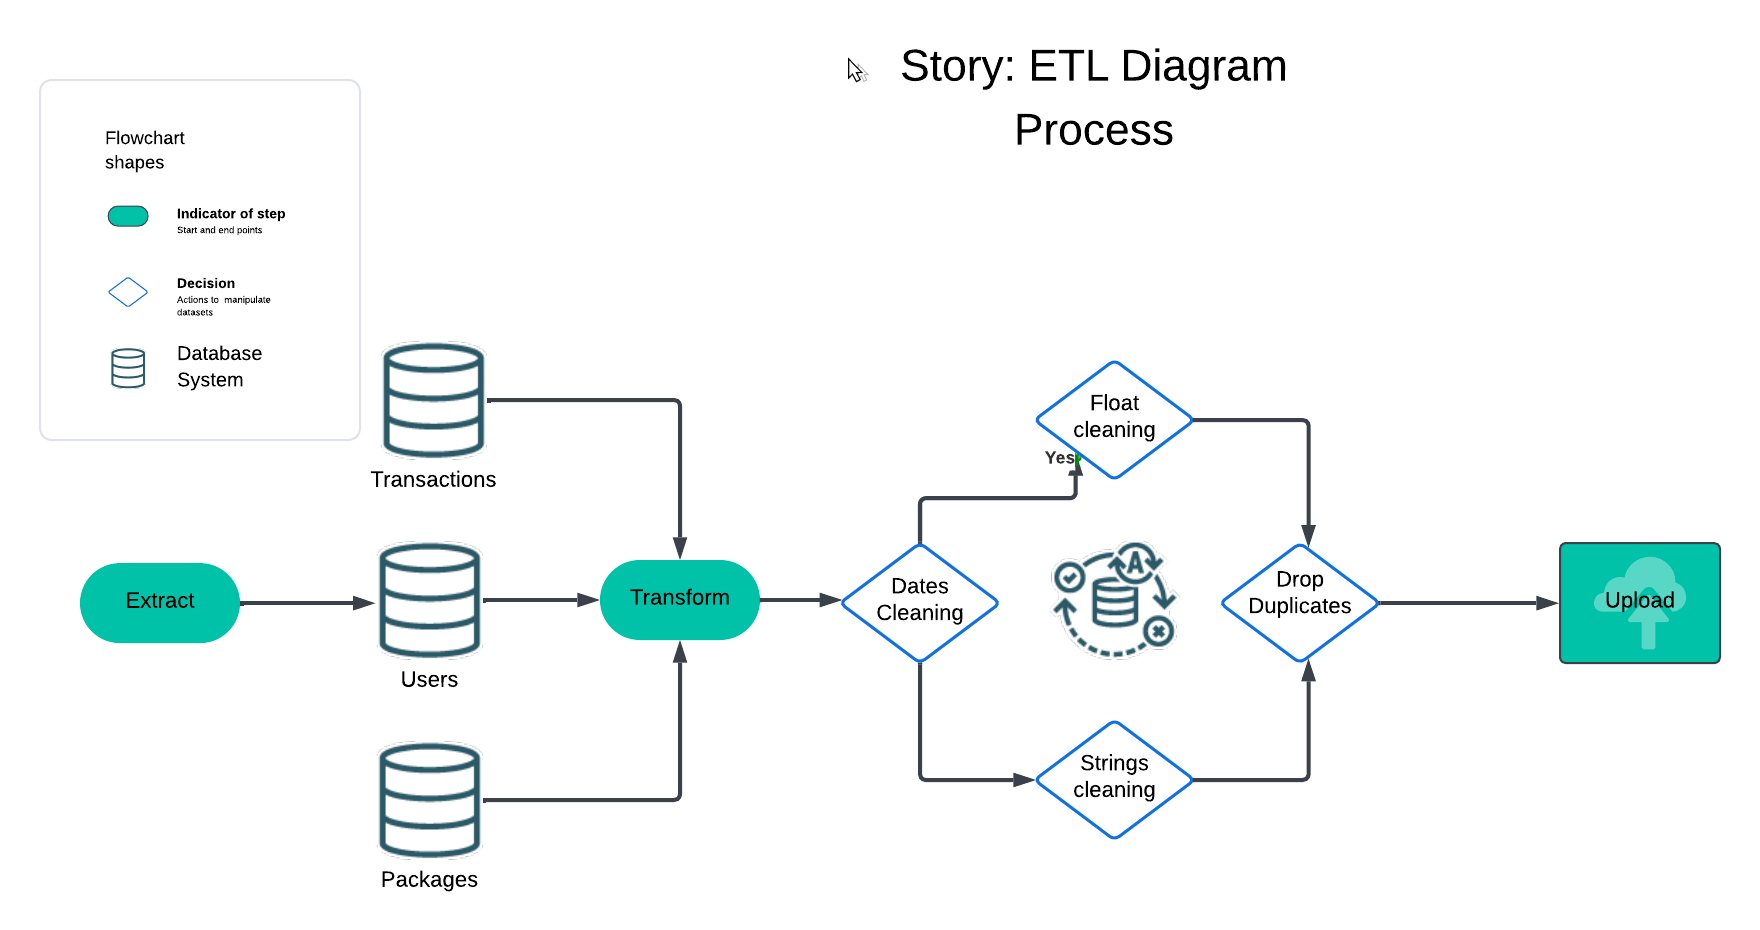

#### Which part of the process would you emphasize most?

**In this case the data cleaning process is the most crucial.
So I recommend that the focus must be on this part.**

#### Simulation of the DAG Process

This simulation consist in 2 parts
1. Creation of the functions in Python
2.  An Airflow python code that is all commented and converted a text.
This is because Airflow can't be executed in Colaboratory.
But the intention is to show how the process of DAG could be working


###### Functions available not necessary for Airflow

In [132]:
#### NOTE this functions were used in previous code, so i paste it here in order to make easier to read the next code

import pandas as pd
import numpy as np
from datetime import datetime
import re
from sqlalchemy import create_engine
from sqlalchemy.exc import SQLAlchemyError

#### Functions available for all the next process

##### Download a file from a driveID
def downloadDrivefile(fileId, fileName):
  fileDownloaded = drive.CreateFile({'id': fileId})
  fileDownloaded.GetContentFile(fileName)

#### Detect different dates formats and convert them into YYYY-MM-DD or YYYY-MM-DD HH:MM:SS
def detectPatternDateFromStr(datestr: str) -> Optional[str]:
  dictPatterns={
      r'^\d{4}-\d{2}-\d{2}$':'%Y-%m-%d',
      r'^\d{4}\.\d{2}\.\d{2}$':'%Y.%m.%d',
      #r'^\d{2}-\d{2}-\d{4}$':'%m-%d-%Y',
      r'^\d{2}/\d{2}/\d{4}$':'%m/%d/%Y',
      r'^\d{4}/\d{2}/\d{2}$':'%Y/%m/%d',
      r'^\d{2}\.\d{2}\.\d{4}$':'%m.%d.%Y',
      r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$':'%Y-%m-%d %H:%M:%S',
      r'^\d{2}/\d{2}/\d{4} \d{2}:\d{2} [APap][Mm]$':'%m/%d/%Y %I:%M %p',
      r'^\d{4}\.\d{2}\.\d{2} \d{2}:\d{2}$':'%Y.%m.%d %H:%M',
      r'^\d{2}-\d{2}-\d{4} \d{2}:\d{2}$':'%d-%m-%Y %H:%M',
      #r'^\d{2}-\d{2}-\d{2}$':'%m-%d-%y',
      r'^([0-2][0-9]|3[0-1])-(0[1-9]|1[0-2])-\d{4}$':'%d-%m-%Y',
      r'^(0[1-9]|1[0-2])-([0-2][0-9]|3[0-1])-\d{4}$':'%m-%d-%Y',
      r'^\d{4}\d{2}\d{2}$':'%Y%m%d',
      r'^\d{2}/\d{2}/\d{2}$':'%m/%d/%y'
  }

  for pattern, format in dictPatterns.items():
    if re.match(pattern, datestr):
      return format

  return None

#### Execute the previous function and convert a column in datetime format
def convertStrToDateFromFormat(datestr):
  dateFormat = detectPatternDateFromStr(datestr)
  if dateFormat:
    return pd.to_datetime(datestr, format= dateFormat)
  else:
    return None


##### Clean a dataframe from spaces and convert to lowercase, except id columns and name or email columns
def cleandAndLower(df):
  columns = df.columns
  for column in columns:
    if df[column].dtype=='object':
      if not re.search('id|name|email', column):
        df[column]= df[column].str.strip()
        df[column]= df[column].str.lower()
  return df

##### Convert a dataframe to mysql
def populateTableFromDf(df, connection_string, database_table):
  try:
    engine = create_engine(connection_string)
    with engine.connect() as connection:
      df.to_sql(
          name= database_table,
          con = connection,
          if_exists = 'append',
          index=False#,
          #dtype={primary_key: 'PRIMARY KEY'}
      )
      print(f'Database {database_table} populated correctly')
  except SQLAlchemyError as e:
    print(f'Error in the process: {e}')

###### Non executable code for simulation in Airflow

########## DAG SIMULATION
```
from airflow import DAG
from airflow.operators.python_operator import PythonOperator

#### Default Arguments of the DAG
default_args = {
    'owner': 'airflow',
    'depends_on_past': False,
    'start_date': datetime(2023, 11, 1),
    'retries': 1
}

dag = DAG(
    'etl_process_dag',
    default_args=default_args,
    description='ETL process for data loading into MySQL',
    schedule_interval=None
)

# Global variables and data conection
packageData = transactionData = userData = None

user = 'avnadmin'
password = 'the MYSQL PASSS'
host = 'mysql-1f1f1a85-my1project-fdn.i.aivencloud.com'
port = 25864
database = 'defaultdb'
sslPath = '/content/ca.pem'

connectionString = (
    f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}?"
    f"ssl_ca={sslPath}"
)

############################ EXTRACT
def extract_data():
    global packageData, transactionData, userData
    packageData = pd.read_csv('package_delivery_info.csv')
    transactionData = pd.read_csv('transaction_info.csv')
    userData = pd.read_csv('user_info.csv')
    print("Data extracted successfully.")


############################ TRANSFORM

def transform_data():
    global packageData, transactionData, userData
    packageData['delivery_date'] = packageData['delivery_date'].apply(convertStrToDateFromFormat)
    transactionData['transaction_date'] = transactionData['transaction_date'].apply(convertStrToDateFromFormat)
    userData = cleandAndLower(userData)
    print("Data transformed successfully.")

############################ LOAD
def load_data():
    global packageData, transactionData, userData
    populateTableFromDf(packageData, connectionString, 'package_delivery')
    populateTableFromDf(transactionData, connectionString, 'transactions')
    populateTableFromDf(userData, connectionString, 'users')
    print('The datasets were loaded into MySQL.')

# Task of the DAG
extract_task = PythonOperator(
    task_id='extract_data',
    python_callable=extract_data,
    dag=dag
)

transform_task = PythonOperator(
    task_id='transform_data',
    python_callable=transform_data,
    dag=dag
)

load_task = PythonOperator(
    task_id='load_data',
    python_callable=load_data,
    dag=dag
)

## Let's define the esquem
extract_task >> transform_task >> load_task


### And that's the DAG process


```



### 4.- SQL Queries area
Instructions
Write SQL queries to answer the following:
- How many users are there in total?
- How many users have transacted?
- What is the card delivery rate?
- Which is the most efficient package courier?
- Which are the top 10 categories with the most transactions?

#### Create the databases in mysql

I'm going to create the datasets in the mysql cluster.

I use a service called [aiven](https://aiven.io/) that allows me to create simple mysql clusters

In [88]:
from google.colab import userdata
mysqlPass= userdata.get('MySQLSecret') ## Password of the mysql connection

In [89]:
### Main credentials and inputs to connect to the mysql database
user = 'avnadmin'
password = mysqlPass
host='mysql-1f1f1a85-my1project-fdn.i.aivencloud.com'
port= 25864
database= 'defaultdb'
sslPath = '/content/ca.pem'

connectionString = (
    f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}?"
    f"ssl_ca={sslPath}"
)


In [90]:
from sqlalchemy import create_engine
from sqlalchemy.exc import SQLAlchemyError
from sqlalchemy import text

In [91]:
### Let's check the database connection
engine = create_engine(connectionString)


In [92]:
#### Try the connection
try:
  engine.connect()
  print('Sucessful Connection')
except Exception as e:
  print(f'Error in connection {e}')


Sucessful Connection


In [93]:
### Function to create a table in mysql from a query
def createTableFromSQL(sql_query, connection_string):
  try:
    engine = create_engine(connection_string)
    with engine.connect() as connection:
      connection.execute(text(sql_query))
      print('Query executed successfuly')
    return True
  except SQLAlchemyError as e:
    print(f'Error executing the query: {e}')
    return False


### Function to populate a mysql table from a Pandas dataframe
def populateTableFromDf(df, connection_string, database_table):
  try:
    engine = create_engine(connection_string)
    with engine.connect() as connection:
      df.to_sql(
          name= database_table,
          con = connection,
          if_exists = 'append',
          index=False#,
          #dtype={primary_key: 'PRIMARY KEY'}
      )
      print(f'Database {database_table} populated correctly')
  except SQLAlchemyError as e:
    print(f'Error in the process: {e}')



In [94]:
#### Create queries
transactionsQueryCreation ="""
CREATE TABLE IF NOT EXISTS  transactions (
    transaction_id VARCHAR(36) PRIMARY KEY ,
    user_id VARCHAR(36),
    amount DECIMAL(15, 2),
    timestamp DATETIME,
    transaction_type VARCHAR(50)
)
"""

packagesQueryCreation ="""
CREATE TABLE IF NOT EXISTS  packages (
    package_id VARCHAR(36) PRIMARY KEY ,
    courier VARCHAR(50),
    delivery_date DATETIME,
    delivery_status VARCHAR(50),
    user_id VARCHAR(36)
)
"""

usersQueryCreation ="""
CREATE TABLE IF NOT EXISTS  users (
    user_id VARCHAR(36) PRIMARY KEY ,
    name VARCHAR(75),
    email VARCHAR(100),
    join_date DATETIME
)
"""



In [95]:
### Create transactions table
createTableFromSQL(sql_query=transactionsQueryCreation,
                   connection_string=connectionString)

Query executed successfuly


True

In [96]:
### Create packages table
createTableFromSQL(sql_query=packagesQueryCreation,
                   connection_string=connectionString)

Query executed successfuly


True

In [97]:
### Create users table
createTableFromSQL(sql_query=usersQueryCreation,
                   connection_string=connectionString)

Query executed successfuly


True

#### Populate the tables

I'm goint to fill the tables with the dataframes

In [47]:
### Populate or fill the transactions table
populateTableFromDf(df=transactionData, connection_string=connectionString,
                    database_table='transactions')

Database transactions populated correctly


In [49]:
### Populate or fill the packages table
populateTableFromDf(df=packageData, connection_string=connectionString,
                    database_table='packages')

Database packages populated correctly


In [50]:
### Populate or fill the users table
populateTableFromDf(df=userData, connection_string=connectionString,
                    database_table='users')

Database users populated correctly


#### Answering the queries

In [100]:
#### Function to get the data from a query
def getDataFromSQL(sql_query, connection_string) -> pd.DataFrame:
  try:
    engine = create_engine(connection_string)
    with engine.connect() as connection:
      df= pd.read_sql(sql_query, connection)
      print('Query executed successfuly')
    return df
  except SQLAlchemyError as e:
    print(f'Error in the query execution: {e}')
    return pd.DataFrame()

##### 1 How many users are there in total?

In [101]:
questionQuery1 = '''
SELECT
	COUNT(DISTINCT users.user_id) AS unique_users
FROM defaultdb.users AS users
'''

In [103]:
dfQ1 = getDataFromSQL(sql_query = questionQuery1, connection_string=connectionString)
### How many users are there in total?
print('How many users are there in total?')

print(f"The total number of users is: {dfQ1['unique_users'][0]}")

Query executed successfuly
How many users are there in total?
The total number of users is: 10000


##### 2 How many users have transacted?

In [105]:
questionQuery2 = '''
SELECT
	CASE
		WHEN transactions.transaction_id IS NOT NULL
		THEN 'Make a transaction'
		ELSE 'User no make a transaction'
	END,
	COUNT(DISTINCT users.user_id) AS users
FROM defaultdb.users AS users
LEFT JOIN defaultdb.transactions AS transactions ON
	(users.user_id= transactions.user_id)
GROUP BY 1
'''

In [113]:
dfQ2 = getDataFromSQL(sql_query = questionQuery2, connection_string=connectionString)
### How many users have transacted?
print('How many users have transacted?')
print(f"The total number of users who make a transaction is: {dfQ2['users'][0]}")

Query executed successfuly
How many users have transacted?
The total number of users who make a transaction is: 10000


##### 3 What is the card delivery rate?

In [114]:
questionQuery3 = '''
WITH filteredData AS (
	SELECT
		SUM(CASE
			WHEN packages.delivery_status= 'delivered'
			THEN 1 ELSE 0
		END) AS delivered_packages,
		SUM(1) AS total_packages
	FROM defaultdb.transactions AS transactions
	LEFT JOIN defaultdb.packages AS packages ON
		(transactions.user_id= packages.user_id)
	WHERE transactions.transaction_type IN ('subscription', 'online')
)
SELECT
	filteredData.delivered_packages,
	filteredData.total_packages,
	filteredData.delivered_packages/filteredData.total_packages AS delivery_rate
FROM filteredData
'''

In [117]:
#### Note, there is no a category called "card" so I considered the categories "subscription" and "online" as related with card payment
dfQ3 = getDataFromSQL(sql_query = questionQuery3, connection_string=connectionString)
### What is the card delivery rate?
print('What is the card delivery rate?')

print(f"The delivery rate is: {dfQ3['delivery_rate'][0]*100}%")

Query executed successfuly
What is the card delivery rate?
The delivery rate is: 25.16%


##### 4 Which is the most efficient package courier?

In [118]:
questionQuery4 = '''
WITH courierPerformance AS (
	SELECT
		packages.courier,
		SUM(CASE
			WHEN packages.delivery_status= 'delivered'
			THEN 1 ELSE 0
		END) AS delivered_packages,
		COUNT(1) AS total_packages
	FROM defaultdb.packages AS packages
	GROUP BY 1
)
SELECT
	courier,
	delivered_packages,
	total_packages,
	delivered_packages/total_packages AS efficiency
FROM courierPerformance
ORDER BY 4 DESC
'''

Query executed successfuly


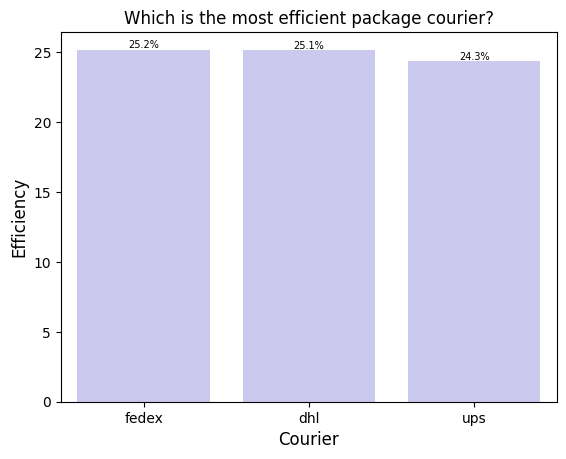

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

dfQ4 = getDataFromSQL(sql_query = questionQuery4, connection_string=connectionString)
### Which is the most efficient package courier?
#print('Which is the most efficient package courier?')

dfQ4['efficiency']=dfQ4['efficiency']*100

packageCourier = sns.barplot(data = dfQ4, x = 'courier', y = 'efficiency',
                             color='#c7c3f4')

# This is where you create the labels for the graph as percents
labelsC = (dfQ4['efficiency'].round(1).astype(str) + '%').values

packageCourier.bar_label(packageCourier.containers[0],
                         labels = labelsC, fontsize= 7)
plt.title('Which is the most efficient package courier?')

plt.ylabel('Efficiency', fontsize=12)

plt.xlabel('Courier', fontsize=12)
plt.show()

##### 5 Which are the top 10 categories with the most transactions?

In [127]:
questionQuery5 = '''
SELECT
	CONCAT(transactions.transaction_type, '-', packages.delivery_status) AS category ,
	SUM(1) AS transactions
FROM defaultdb.transactions  AS transactions
LEFT JOIN defaultdb.packages AS packages ON
	(transactions.user_id= packages.user_id)
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10
'''

Query executed successfuly
Which are the top 10 categories with the most transactions?


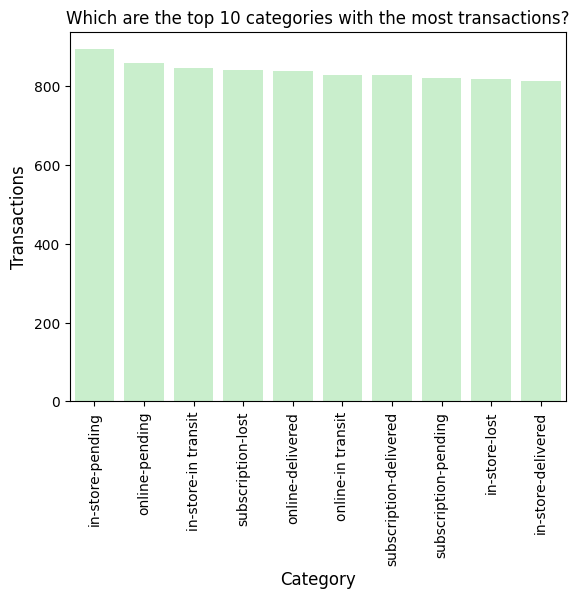

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
dfQ5 = getDataFromSQL(sql_query = questionQuery5, connection_string=connectionString)
### Which are the top 10 categories with the most transactions?
print('Which are the top 10 categories with the most transactions?')


sns.barplot(data = dfQ5, x= 'category',
            y= 'transactions', color='#c3f4c7').set_title('Which are the top 10 categories with the most transactions?')

plt.xticks(rotation=90)
plt.ylabel('Transactions', fontsize=12)

plt.xlabel('Category', fontsize=12)

plt.show()


 ### Conclusions

**This was a very interesting challenge and I used several techniques to solve it.
I prefered the ETL process over the ELT because the data has several problems that were easier to solve before to upload to the database**

### References

1. https://airflow.apache.org/docs/apache-airflow/stable/core-concepts/index.html
2. https://medium.com/@maheshbhatm/how-to-run-an-airflow-dag-with-parameters-using-the-airflow-api-97def0c6af81
3. https://konfuzio.com/en/regex-date-python/
4. https://medium.com/@techsuneel99/understanding-uml-the-unified-modeling-language-bfec589df4f7

### Greetings

**Thanks for giving me this opportunity**

**I hope my explanations and code were reliable and easy to understand.**